In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os, random, glob
import cv2

In [19]:
!bzip2 -dk /teamspace/studios/this_studio/MoroccoAI_Hackathon/furnas_dataset_v0.07.tar.bz

In [20]:
!tar -xvf furnas_dataset_v0.07.tar

furnas_dataset_v0.07/
furnas_dataset_v0.07/.ipynb_checkpoints/
furnas_dataset_v0.07/.ipynb_checkpoints/train_test_split-checkpoint.ipynb
furnas_dataset_v0.07/train.csv
furnas_dataset_v0.07/utils/
furnas_dataset_v0.07/utils/.ipynb_checkpoints/
furnas_dataset_v0.07/utils/.ipynb_checkpoints/dataset_analysis-checkpoint.ipynb
furnas_dataset_v0.07/utils/replace_text_on_yolo_annotations.py
furnas_dataset_v0.07/utils/xml2coco.py
furnas_dataset_v0.07/utils/copy_img_files_from_xml_files.py
furnas_dataset_v0.07/utils/train_test_split.ipynb
furnas_dataset_v0.07/utils/copy_files_from_csv.py
furnas_dataset_v0.07/utils/train_test_split_csv.py
furnas_dataset_v0.07/utils/xml_to_csv.py
furnas_dataset_v0.07/utils/dataset_analysis.ipynb
furnas_dataset_v0.07/utils/generate_tfrecord.py
furnas_dataset_v0.07/data/
furnas_dataset_v0.07/data/coco/
furnas_dataset_v0.07/data/coco/test.json
furnas_dataset_v0.07/data/coco/train.json
furnas_dataset_v0.07/data/labels.txt
furnas_dataset_v0.07/data/xml/
furnas_dataset_

## Stuff to copy paste 
data/furnas_dataset_v0.07

In [2]:
def yolo2bbox(bboxes):
    xmin,ymin = bboxes[0] - bboxes[2]/2,bboxes[1] - bboxes[3]/2
    xmax,ymax = bboxes[0] + bboxes[2]/2,bboxes[1] + bboxes[3]/2
    return xmin,ymin,xmax,ymax

In [3]:
def plot_box(image,bboxes,labels):
    h,w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1,y1,x2,y2 = yolo2bbox(box)
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2,int(w/275))
        
        cv2.rectangle(
            image,
            (xmin,ymin), (xmax,ymax),
            color = (0,0,255),
            thickness = thickness
        )
    return image

## Dataset change of values
updating the class indexing from 1-11 --> 0-10, ultralytics requires class indexing to start from 0.

In [4]:
def plot(image_paths,label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()
    num_images = len(all_images)

    plt.figure(figsize=(15,12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name +'.txt'),'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                splitting = label_line.split(' ')
                label = splitting[0]
                x_c,y_c,w,h = splitting[1:]
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c,y_c,w,h])
                labels.append(label)
        result_image = plot_box(image,bboxes,labels)
        plt.subplot(2,2,i+1)
        plt.imshow(result_image[:,:,::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()

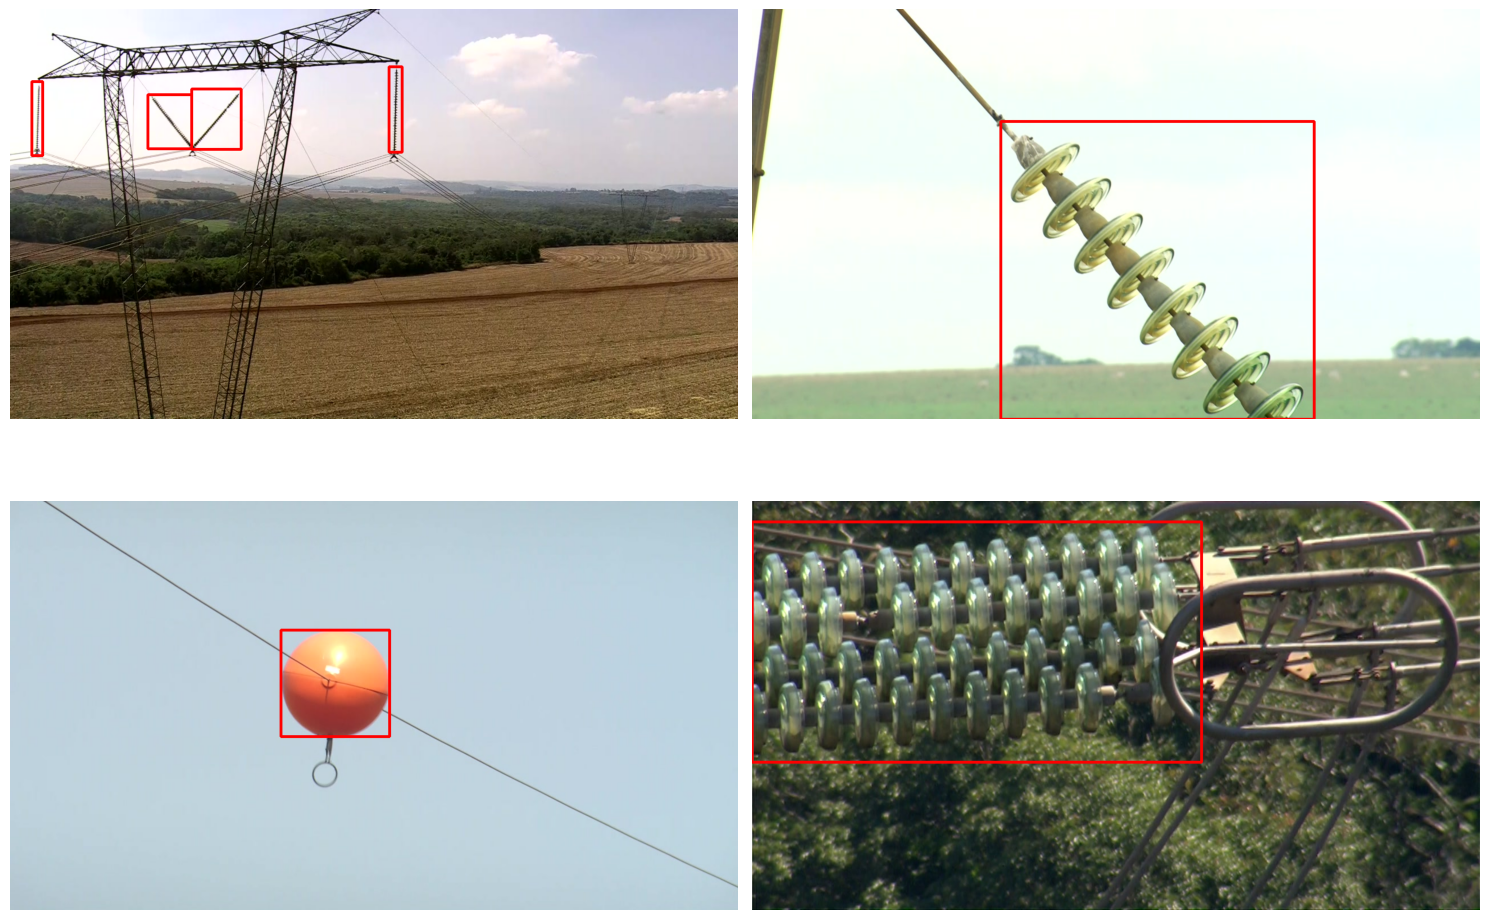

In [5]:
plot(
    image_paths = 'furnas_dataset_v0.07/imgs/train/',
    label_paths = 'furnas_dataset_v0.07/data/yolo/train/',
    num_samples = 4
)

### Error handling
Fixing labels of the datasets going from 1-11 -> 0-10, and fixing some mislabelling of data 


def fix_class_indexing():
    training_path = 'datasets/dataset/val/labels'
    testing_path = "datasets/dataset/train/labels"

    train_img_paths = []
    train_img_paths.extend(glob.glob(training_path+'/*.txt'))
    test_img_paths = []
    test_img_paths.extend(glob.glob(testing_path+'/*.txt'))

    for file_path in train_img_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
        modified_lines = []
        for line in lines:
            parts = line.strip().split()
            parts[0] = str(int(parts[0]) + 1)
            modified_lines.append(" ".join(parts))
        
        with open(file_path, 'w') as file:
            file.write("\n".join(modified_lines))

    for file_path in test_img_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
        modified_lines = []
        for line in lines:
            parts = line.strip().split()
            parts[0] = str(int(parts[0]) + 1)
            modified_lines.append(" ".join(parts))
        
        with open(file_path, 'w') as file:
            file.write("\n".join(modified_lines))

fix_class_indexing()

def find_error_class_indexing():
    testing_path = 'datasets/dataset/val/labels'
    training_path = "datasets/dataset/train/labels"

    train_img_paths = []
    train_img_paths.extend(glob.glob(training_path+'/*.txt'))
    test_img_paths = []
    test_img_paths.extend(glob.glob(testing_path+'/*.txt'))


    for file_path in train_img_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            modified_lines = []
        for line in lines:
            parts = line.strip().split()
            if parts[0] == "11":
                parts[0] = str(int(parts[0])-1)
            modified_lines.append(" ".join(parts))

        with open(file_path,'w') as file:
            file.write("\n".join(modified_lines))

    
    for file_path in test_img_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            if parts[0] == "11":
                wrong_test_labels.append(file_path)

find_error_class_indexing()

### Configuration Files + Training YOLO v11 nano Model

In [6]:
%%writefile powerlines_v11.yaml
path: 'powerlines_v11/'
train: 'furnas_dataset_v0.07/imgs/train/'

# class names
names: 
    0: 'baliser_ok'
    1: 'baliser_aok'
    2: 'baliser_nok'
    3: 'insulator_ok'
    4: 'insulator_nok'
    5: 'bird_nest'
    6: 'stockbridge_ok'
    7: 'stockbridge_nok'
    8: 'spacer_ok'
    9: 'spacer_nok'
    10: 'insulator_unk'

Writing powerlines_v8.yaml


In [4]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [11]:
epochs = 5
batch = 8
img_size = 1280

In [9]:
import torch
torch.cuda.empty_cache()

In [12]:
!yolo \
task = detect \
mode = train \
model = yolo11n.pt \
imgsz = {img_size} \
data = powerlines_v8.yaml \
epochs = {epochs} \
batch = {batch}  \
name = yolov11_50e

Ultralytics 8.3.39 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=powerlines_v8.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_50e3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

In [13]:
!yolo \
task = detect\
mode = predict \
model = /teamspace/studios/this_studio/MoroccoAI_Hackathon/runs/detect/yolov11_50e/weights/best.pt \
source = /teamspace/studios/this_studio/MoroccoAI_Hackathon/datasets/dataset/val/images \
imgsz = 1280 \
name = yolo8n_v8_50einfer1280_v1 \
show_labels = True

Ultralytics 8.3.39 🚀 Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11n summary (fused): 238 layers, 2,584,297 parameters, 0 gradients, 6.3 GFLOPs

image 1/628 /teamspace/studios/this_studio/MoroccoAI_Hackathon/datasets/dataset/val/images/LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#031.jpg: 736x1280 1 insulator_ok, 110.2ms
image 2/628 /teamspace/studios/this_studio/MoroccoAI_Hackathon/datasets/dataset/val/images/LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#038.jpg: 736x1280 1 insulator_ok, 9.0ms
image 3/628 /teamspace/studios/this_studio/MoroccoAI_Hackathon/datasets/dataset/val/images/LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#040.jpg: 736x1280 2 insulator_oks, 9.3ms
image 4/628 /teamspace/studios/this_studio/MoroccoAI_Hackathon/datasets/dataset/val/images/LTADRTMR1_LTADRTMR2_T0388_T0387.ts-10974#050.jpg: 736x1280 3 insulator_oks, 1 stockbridge_ok, 8.4ms
image 5/628 /teamspace/studios/this_studio/MoroccoAI_Hackathon/datasets/dataset/val/images/LTADRTMR1_LTADRTMR2_T0388_T0387.

In [14]:
def visualize(result_dir,num_samples=4):
    plt.figure(figsize=(20,12))
    image_names = glob.glob(os.path.join(result_dir,'*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2,2,i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

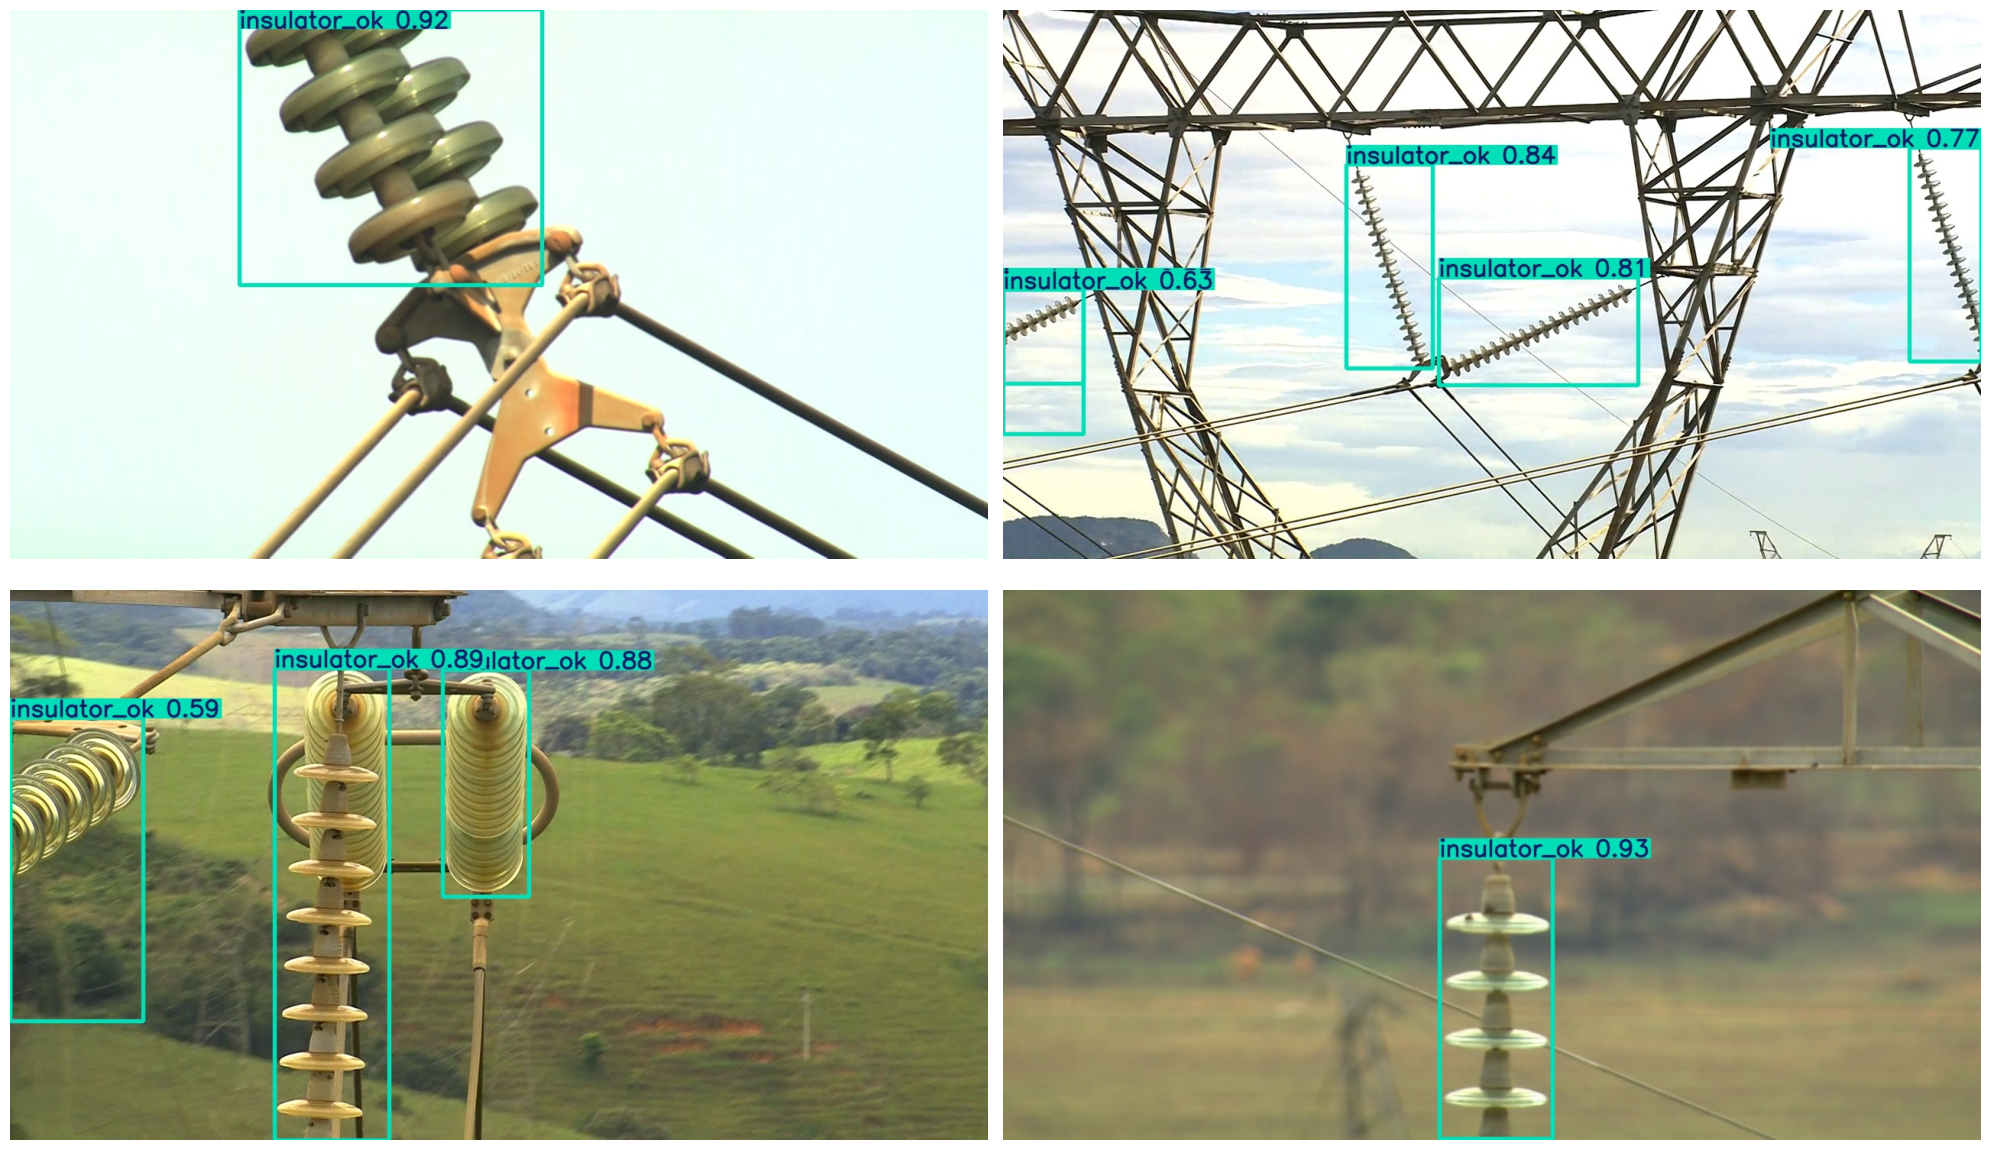

In [15]:
visualize("/teamspace/studios/this_studio/MoroccoAI_Hackathon/runs/detect/yolo8n_v8_50einfer1280_v1/")